,Total P&L,Max Drawdown,Total Trades,Percent Profitable,Profit Factor,Expectancy
Overview performance,2.14%,-1.55%,27,96.30%,2.38,0.0019


,Total Trades,Number of Winning Trades,Number of Losing Trades,Average Trade (%),Average Win (%),Average Loss (%),Largest Win (%),Largest Loss (%)
Trades analysis,27,26,1,0.08%,0.14%,-1.55%,0.28%,-1.55%


,Sharpe Ratio,Sortino Ratio,Calmar Ratio,Profit Factor
Risk/performance ratios,12.95,14.64,96.91,2.38


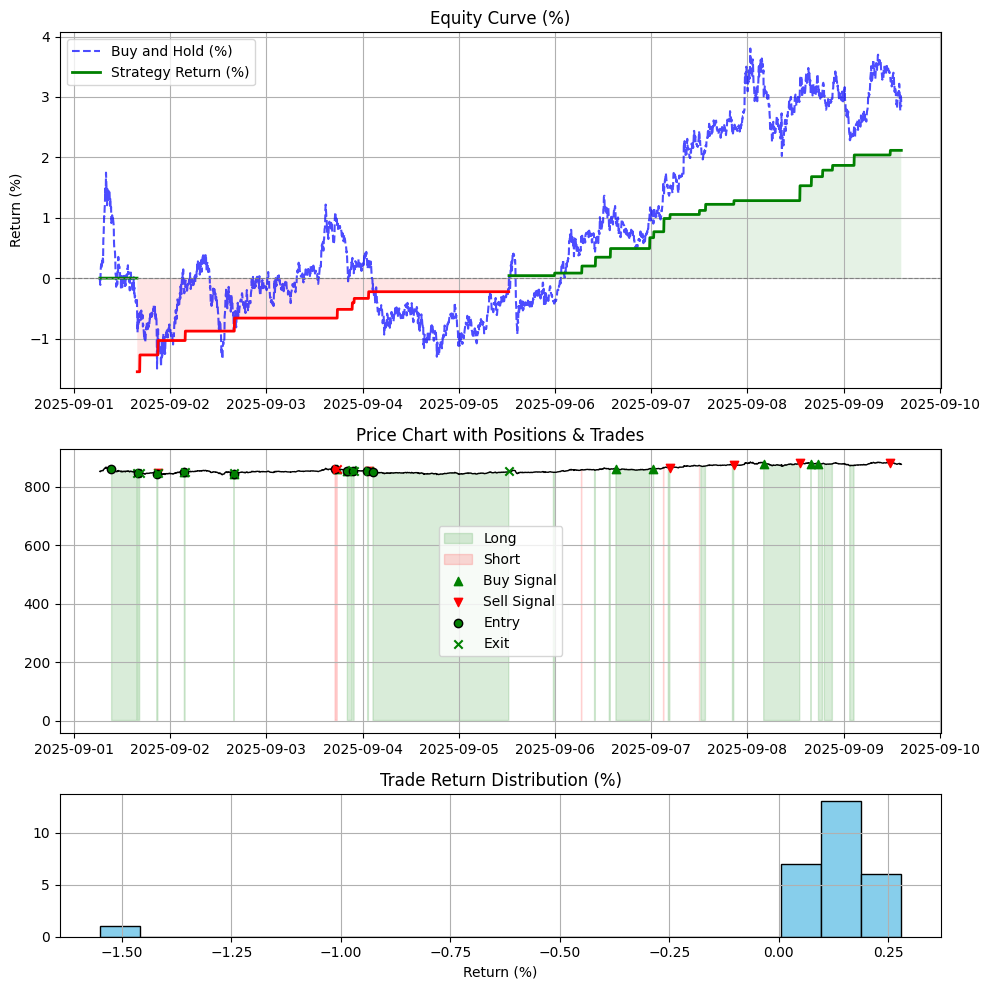

,timestamp,signal,close,reason
10640,2025-09-08 15:48:00+00:00,1,878.950000,Long Entry
10649,2025-09-08 15:57:00+00:00,-1,880.250000,Long TP
10756,2025-09-08 17:44:00+00:00,1,879.260000,Long Entry
10818,2025-09-08 18:46:00+00:00,-1,880.190000,Long TP
10842,2025-09-08 19:10:00+00:00,1,878.840000,Long Entry
10967,2025-09-08 21:15:00+00:00,-1,879.520000,Long TP
11222,2025-09-09 01:30:00+00:00,1,872.990000,Long Entry
11289,2025-09-09 02:37:00+00:00,-1,874.470000,Long TP
11831,2025-09-09 11:39:00+00:00,1,880.730000,Long Entry
11832,2025-09-09 11:40:00+00:00,-1,881.390000,Long TP


In [10]:
import warnings 
warnings.filterwarnings('ignore')
from Technicalindicatorstrategy import fvg_rsi_strategy,fvg_rsi_strategy_optimized
from Backtest.backtest import backtest_signals
from Plot.plot import display_trades_log_as_html,plot_backtest_result
from IPython.display import HTML
import pandas as pd
from datetime import datetime,timedelta
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
np.random.seed(42)  # ✅ 固定隨機性（可重現性）
import random
random.seed(42)

df_signals = fvg_rsi_strategy_optimized.get_signals('BNBUSDT','1m',datetime.now(),12000)

result = backtest_signals(
    df_signals.copy(),
    initial_capital = 100, # 1000台幣
    fee_rate = 0.0000, # 合約手續費
    leverage = 1, # 槓桿
    allow_short = True, # 是否做空
    stop_loss = None,       # 停損閾值，例如0.05代表5%
    take_profit = None,     # 停利閾值
    capital_ratio = 1, # 每次使用的資金佔比
    max_hold_bars = 100000,# 最大持有K棒數
    delay_entry=False,
    risk_free_rate=0
    )  
display(pd.DataFrame(result['Overview performance'],index=['Overview performance']))
display(pd.DataFrame(result['Trades analysis'],index=['Trades analysis']))
display(pd.DataFrame(result['Risk/performance ratios'],index=['Risk/performance ratios']))
html_output = display_trades_log_as_html(result['trades_log'][-10:])
plot_backtest_result(result)
display(HTML(html_output))
display(df_signals.loc[df_signals['signal']!=0,['timestamp','signal','close',"reason"]].tail(10).style.background_gradient())